# ANALYSIS OF F.R.I.E.N.D.S EPISODE 1 & 2 SCRIPT USING WORD2VEC

In [1]:
import numpy as np
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.naive_bayes import GaussianNB
import re

C:\Users\Sangarshanan Veera\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
from nltk.tokenize import word_tokenize

** Opening the script file **

In [3]:
f = open('friends.txt','r')
l = (f.read().split('\n'))
l = [x for x in l if x]

** The First four dialogues of the fisrt episode....GOOSEBUMPS ALERT **

In [4]:
for i in range(0,4):
    print(l[i])

Monica: There's nothing to tell! He's just some guy I work with!
Joey: C'mon, you're going out with the guy! There's gotta be something wrong with him!
Chandler: All right Joey, be nice.  So does he have a hump? A hump and a hairpiece?
Phoebe: Wait, does he eat chalk?


**We have these unwanted expressions to remove**

In [95]:
f = open('friends.txt','r')
t = f.read()
token = word_tokenize(t)
token = [w.lower() for w in token]
words = [word for word in token if word.isalpha()]
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]

In [98]:
words[:5]

['monica', 'nothing', 'tell', 'guy', 'work']

<b> Now for episode 2

In [40]:
f = open('episode.txt','r')
t = f.read()
token = word_tokenize(t)
token = [w.lower() for w in token]
words = [word for word in token if word.isalpha()]
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words1 = [w for w in words if not w in stop_words]

In [94]:
words1[:5]

['monica', 'guys', 'understand', 'us', 'kissing']

## Looks like monica is the first to talk in both episodes

In [99]:
data =[]
data.append(words)
data.append(words1)
len(data)

2

In [100]:
model = Word2Vec(data, min_count=1,size=300,workers=4)

## LET US SEE IF RACHEL LOVES MONICA OR ROSS

In [101]:
print(model.similarity('monica', 'rachel'))

0.528681712201


C:\Users\Sangarshanan Veera\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


In [102]:
print(model.similarity('rachel', 'ross'))

0.677953374934


C:\Users\Sangarshanan Veera\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


<b> A win for ross... YAYYYY

In [103]:
print(model.similarity('chandler', 'joey'))

0.474364113255


C:\Users\Sangarshanan Veera\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


C:\Users\Sangarshanan Veera\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


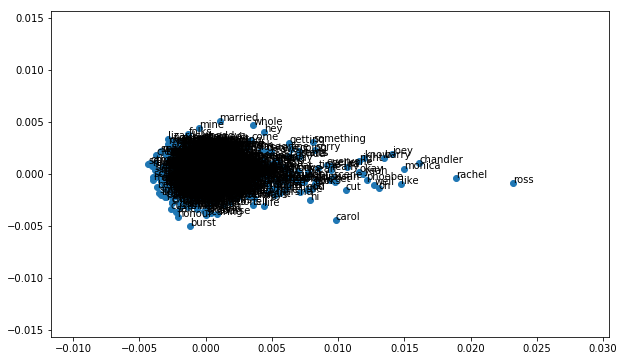

In [104]:
from sklearn.decomposition import PCA, TruncatedSVD
from matplotlib import pyplot as plt

% matplotlib inline

X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.figure(figsize=(10,6))
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

<b> It look like we could see the chandler<->rachel<->monica<->ross<->Joey circle well within the first two episodes...I suppose phoebe takes her time

## LETS DIG DEEPER TO GAIN INSIGHTS

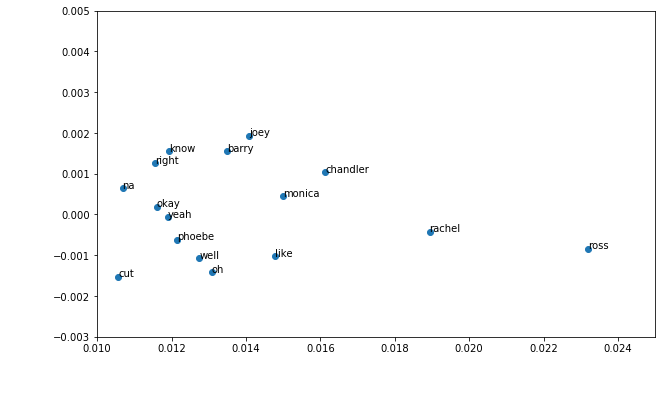

In [105]:
plt.figure(figsize=(10,6))
plt.axis([0.010,0.025,-0.003,0.005])
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

<B> IT lOOKS LIKE RACHEL AND ROSS ARE TOGETHER IN THE GRAPHS TOO....AWWW  <BR>
<B> ALSO BARRY AND CAROL SEEM TO BE A PART OF THE GROUP CONSIDERING THEIR ROLES IN THE INITIAL EPISODES

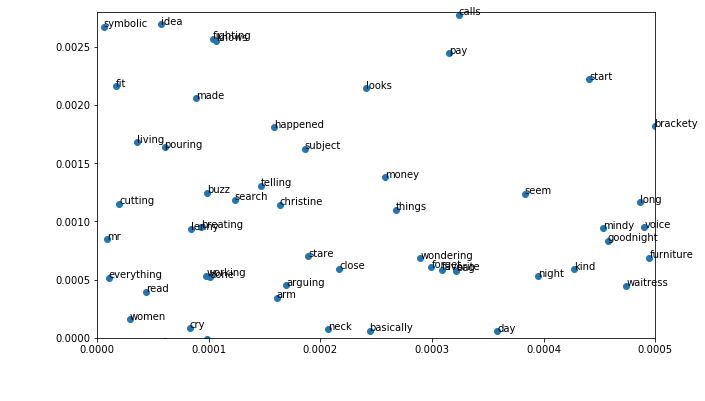

In [106]:
plt.figure(figsize=(10,6))
plt.axis([0.0000,0.0005,0.000,0.00280])
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

## It looks like the people and activities are clustered on either sides

In [107]:
model.most_similar("ross")

C:\Users\Sangarshanan Veera\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('rachel', 0.6779533624649048),
 ('chandler', 0.6337089538574219),
 ('monica', 0.6217241287231445),
 ('like', 0.608002781867981),
 ('oh', 0.5999596118927002),
 ('joey', 0.5770808458328247),
 ('really', 0.5656390190124512),
 ('barry', 0.552516520023346),
 ('well', 0.5484067797660828),
 ('phoebe', 0.5477455258369446)]

In [116]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = model.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [120]:
nearest_similarity_cosmul("chandler", "joey","ross")


chandler is related to joey, as rachel is related to ross


C:\Users\Sangarshanan Veera\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  after removing the cwd from sys.path.


'rachel'

## What can i say... chandler loves joey as much as rachel loves ross ❤️

## Important points to note
The first parameter passed to gensim.models.Word2Vec is an iterable of sentences. Sentences themselves are a list of words. From the docs:

Initialize the model from an iterable of sentences. Each sentence is a list of words (unicode strings) that will be used for training.

Right now, it thinks that each word in your list b is a sentence and so it is doing Word2Vec for each character in each word, as opposed to each word in your b. Right now you can do:

### model = gensim.models.Word2Vec(b,min_count=1,size=32)

print(model['a'])
array([  7.42487283e-03,  -5.65282721e-03,   1.28707094e-02, ... ]
To get it to work for words, simply wrap b in another list so that it is interpreted correctly:

### model = gensim.models.Word2Vec([b],min_count=1,size=32)

print(model['buy'])
array([-0.01331611,  0.00496594, -0.00165093, -0.01444992,  0.01393849, ... ]